In [1]:
import pandas as pd
import numpy as np
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
dfplus = pd.read_csv("order_details_sample.csv")
dfplus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204204 entries, 0 to 204203
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   date_key    204204 non-null  object
 1   order_id    204204 non-null  int64 
 2   quantity    204204 non-null  int64 
 3   hub_id      204204 non-null  int64 
 4   product_id  204204 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 7.8+ MB


In [18]:
#separate data per hub
df8 = dfplus[dfplus['hub_id'] == 8].drop('hub_id', axis=1)
df207 = dfplus[dfplus['hub_id'] == 207].drop('hub_id', axis=1)
df8.info()
df207.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174194 entries, 0 to 204203
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   date_key    174194 non-null  object
 1   order_id    174194 non-null  int64 
 2   quantity    174194 non-null  int64 
 3   product_id  174194 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 6.6+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 30010 entries, 60 to 204124
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date_key    30010 non-null  object
 1   order_id    30010 non-null  int64 
 2   quantity    30010 non-null  int64 
 3   product_id  30010 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.1+ MB


In [19]:
# Recover transaction itemsets from orders DataFrame.
transactions = df8.groupby("order_id").product_id.unique()

# Print transactions header.
transactions.head()

order_id
3181466                           [307, 2111, 277]
3181501                    [237, 2755, 1305, 2160]
3181506    [1104, 1102, 2816, 2461, 877, 878, 112]
3181509                                     [2630]
3181512                           [1157, 447, 546]
Name: product_id, dtype: object

In [20]:
transactions = transactions.tolist()

In [21]:
len(transactions)

34247

In [22]:
from mlxtend.preprocessing import TransactionEncoder

# Instantiate an encoder.
encoder = TransactionEncoder()

# Fit encoder to list of lists.
encoder.fit(transactions)

# Transform lists into one-hot encoded array.
onehot = encoder.transform(transactions)

# Convert array to pandas DataFrame.
onehot = pd.DataFrame(onehot, columns = encoder.columns_)

In [23]:
# Print header.
onehot.head()

,1,2,3,4,5,7,8,9,10,11,...,3586,3587,3588,3589,3590,3591,3592,3593,3594,3595
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [24]:
# Print support metric over all rows for each column.
onehot.mean(axis=0)

1       0.002073
2       0.009490
3       0.000029
4       0.001460
5       0.001314
          ...   
3591    0.000146
3592    0.000117
3593    0.000058
3594    0.000117
3595    0.000058
Length: 3370, dtype: float64

In [25]:
# Print distribution of item counts.
onehot.sum(axis=1).value_counts()

1     4806
3     4589
2     4453
4     4350
5     3836
6     3099
7     2414
8     1781
9     1326
10     899
11     654
12     495
13     383
14     266
15     202
16     145
17      97
18      86
19      83
20      57
23      34
22      29
21      29
25      20
24      19
26      16
28      10
27       9
29       8
34       7
33       6
30       5
31       4
37       4
39       4
32       4
36       3
35       3
42       3
38       2
44       1
40       1
47       1
57       1
41       1
61       1
46       1
dtype: int64

In [26]:
from mlxtend.frequent_patterns import apriori

# Apply apriori algorithm to data with min support threshold of 0.01.
frequent_itemsets = apriori(onehot, min_support = 0.0013,use_colnames = True)

# Print frequent itemsets.
frequent_itemsets

,support,itemsets
0,0.002073,(1)
1,0.009490,(2)
2,0.001460,(4)
3,0.001314,(5)
4,0.005431,(9)
...,...,...
1421,0.001489,"(1617, 1618, 1244)"
1422,0.001986,"(1617, 1618, 1245)"
1423,0.001956,"(1720, 1617, 1245)"
1424,0.001518,"(296, 293, 294, 295)"


In [ ]:
# Apply apriori algorithm to data with a two-item limit.
#frequent_itemsets = apriori(onehot, min_support = 0.0001, max_len = 2, use_colnames = True)

In [27]:
from mlxtend.frequent_patterns import association_rules

# Recover association rules using support and a minimum threshold of 0.0001.
rules = association_rules(frequent_itemsets, metric = 'support', min_threshold = 0.0001)

# Print rules header.
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(185),(2),0.061757,0.009490,0.002161,0.034988,3.686893,0.001575,1.026423,0.776738
1,(2),(185),0.009490,0.061757,0.002161,0.227692,3.686893,0.001575,1.214856,0.735751
2,(17),(908),0.006774,0.088971,0.001372,0.202586,2.276984,0.000770,1.142479,0.564648
3,(908),(17),0.088971,0.006774,0.001372,0.015425,2.276984,0.000770,1.008786,0.615593
4,(17),(1242),0.006774,0.019038,0.001402,0.206897,10.867464,0.001273,1.236865,0.914175


In [28]:
# Recover association rules using confidence threshold of 0.01.
rules = association_rules(frequent_itemsets, metric = 'confidence', min_threshold = 0.01)

# Print rules.
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(185),(2),0.061757,0.009490,0.002161,0.034988,3.686893,0.001575,1.026423,0.776738
1,(2),(185),0.009490,0.061757,0.002161,0.227692,3.686893,0.001575,1.214856,0.735751
2,(17),(908),0.006774,0.088971,0.001372,0.202586,2.276984,0.000770,1.142479,0.564648
3,(908),(17),0.088971,0.006774,0.001372,0.015425,2.276984,0.000770,1.008786,0.615593
4,(17),(1242),0.006774,0.019038,0.001402,0.206897,10.867464,0.001273,1.236865,0.914175
...,...,...,...,...,...,...,...,...,...,...
933,"(294, 295)","(1045, 293)",0.007096,0.004117,0.001314,0.185185,44.978986,0.001285,1.222220,0.984755
934,(293),"(1045, 294, 295)",0.016060,0.002015,0.001314,0.081818,40.609091,0.001282,1.086915,0.991295
935,(1045),"(293, 294, 295)",0.011037,0.002774,0.001314,0.119048,42.916040,0.001283,1.131986,0.987599
936,(294),"(1045, 293, 295)",0.017345,0.002044,0.001314,0.075758,37.063853,0.001279,1.079756,0.990194


In [29]:
# Select rules with leverage higher than 0.0.
rules = rules[rules['leverage'] > 0.0]

# Print rules.
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(185),(2),0.061757,0.009490,0.002161,0.034988,3.686893,0.001575,1.026423,0.776738
1,(2),(185),0.009490,0.061757,0.002161,0.227692,3.686893,0.001575,1.214856,0.735751
2,(17),(908),0.006774,0.088971,0.001372,0.202586,2.276984,0.000770,1.142479,0.564648
3,(908),(17),0.088971,0.006774,0.001372,0.015425,2.276984,0.000770,1.008786,0.615593
4,(17),(1242),0.006774,0.019038,0.001402,0.206897,10.867464,0.001273,1.236865,0.914175
...,...,...,...,...,...,...,...,...,...,...
933,"(294, 295)","(1045, 293)",0.007096,0.004117,0.001314,0.185185,44.978986,0.001285,1.222220,0.984755
934,(293),"(1045, 294, 295)",0.016060,0.002015,0.001314,0.081818,40.609091,0.001282,1.086915,0.991295
935,(1045),"(293, 294, 295)",0.011037,0.002774,0.001314,0.119048,42.916040,0.001283,1.131986,0.987599
936,(294),"(1045, 293, 295)",0.017345,0.002044,0.001314,0.075758,37.063853,0.001279,1.079756,0.990194


In [30]:
rules.to_csv('rules_13_8.csv')

<Axes: xlabel='leverage', ylabel='confidence'>

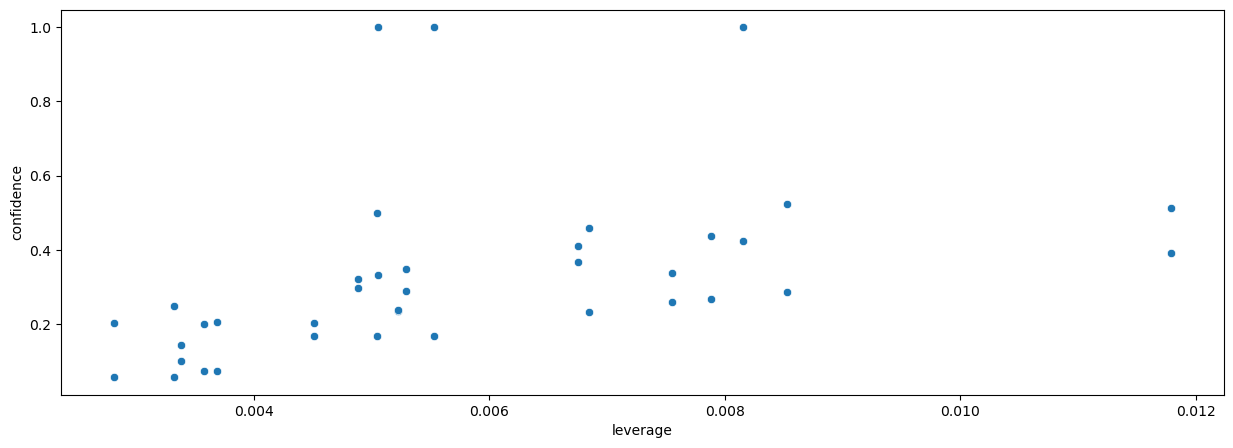

In [16]:
# Recover association rules with a minimum support greater than 0.000001.
rules = association_rules(frequent_itemsets, metric = 'support', min_threshold = 0.00001)

# Plot leverage against confidence.
plt.figure(figsize=(15,5))
sns.scatterplot(x="leverage", y="confidence", data=rules)